In [3]:
pip install tradermade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alpaca-trade-api 2.3.0 requires aiohttp==3.8.1, which is not installed.
alpaca-trade-api 2.3.0 requires websockets<11,>=9.0, but you have websockets 8.1 which is incompatible.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.9/58.9 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tradermade: filename=tradermade-0.5.0-py3-none-any.whl size=4866 sha256=927cbeec86d2ebaf3a59ba1c91f9a3cf07a4329ddd2bc0d5900a057c38e7cbc0
  Stored in directory: c:\users\muhas\appdata\local\pip\cache\wheels\15\e4\e5\cff0a9aa5d5b64cc080eae7d1c787368dc99168ea0fa7971ab
  Created wheel for websockets: filename=websockets-8.1-cp39-cp39-win_amd64.whl size=62745 sha256=45db5d0c56dedc0b985a83b202032010945522a1f4c14fe999c39ed6a56a0cd5
  Stored in directory: c:\users\muhas\appdata\local\pip\cache\wheels\d8\b9\a0\b97b211aeda2ebd6ac2e43fc300d308dbf1f9df520ed390cae
Successfully built tradermade websockets
  Attempting uninstall: websockets
    Found existing installation: websockets 10.3
    Uninstal

In [6]:
from dotenv import load_dotenv
import os
import tradermade as tm
import pandas as pd
from pathlib import Path
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset

import warnings
warnings.filterwarnings('ignore')

In [7]:
# # Set environment variables from the .env in the local environment
# load_dotenv()

In [8]:
# # Retrieve API key and store as Python variable
# api_key = os.getenv("TRADERMADE_API_KEY")
# type(api_key)

In [9]:
# # set api key
# tm.set_rest_api_key(api_key)

# Gain Forex close price time series data from API

In [10]:
# # get timeseries data
# import pandas as pd
# df = pd.DataFrame()
# for i in range(2012, 2022):  
#     x = tm.timeseries(currency='AUDUSD', start=str(i)+"-12-01",fields=["open", "high", "low","close"], end=str(i+1)+"-11-30")
#     df = df.append(x)
# df = df.drop_duplicates()
# df
# # returns timeseries data for the currency requested interval is daily, hourly, minute - fields parameter is optional (you can select ["close"] if you just want close prices)

In [11]:
# df.index = pd.to_datetime(df['date'])

In [12]:
# df = df.drop(columns = "date")
# df

In [13]:
# close_daily = df.drop(columns=["open", "high", "low"])

In [14]:
# close_daily

In [15]:
# close_daily_reset_index.to_csv('close_daily_reset_index.csv', encoding='utf-8', index=True)

In [16]:
# Read in daily close price csv file into dataframe
path_close_daily = "./Resources/close_daily.csv"
close_daily = pd.read_csv(path_close_daily, parse_dates = True, infer_datetime_format = True, index_col = "date")
close_daily

,close
date,
2012-12-03,1.04220
2012-12-04,1.04710
2012-12-05,1.04560
2012-12-06,1.04870
2012-12-07,1.04890
...,...
2022-11-24,0.67646
2022-11-25,0.67524
2022-11-28,0.66524


# Read US unemployment rate data from csv file to a dataframe, convert the data into time series and slice the data from Dec 2012 to Nov 2022 

In [17]:
# read us unemployment rate csv file into dataframe
path_str_us = "./Resources/US-Unemployment rate-2012 to 2022.csv"
path_us = Path(path_str_us)
data_us = pd.read_csv(path_us, parse_dates = True,infer_datetime_format = True)
data_us

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
1,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
2,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
3,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
4,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
5,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
6,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
7,2019,4.0,3.8,3.8,3.6,3.6,3.6,3.7,3.7,3.5,3.6,3.6,3.6
8,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7
9,2021,6.4,6.2,6.0,6.0,5.8,5.9,5.4,5.2,4.7,4.6,4.2,3.9


In [18]:
# convert to 1 dimension time series data
new_data_us=data_us.set_index('Year')
df1_us=new_data_us.stack()
df1_us

Year     
2012  Jan    8.3
      Feb    8.3
      Mar    8.2
      Apr    8.2
      May    8.2
            ... 
2022  Jul    3.5
      Aug    3.7
      Sep    3.5
      Oct    3.7
      Nov    3.7
Length: 131, dtype: float64

In [19]:
df2_us=df1_us.reset_index()
df2_us

,Year,level_1,0
0,2012,Jan,8.3
1,2012,Feb,8.3
2,2012,Mar,8.2
3,2012,Apr,8.2
4,2012,May,8.2
...,...,...,...
126,2022,Jul,3.5
127,2022,Aug,3.7
128,2022,Sep,3.5
129,2022,Oct,3.7


In [20]:
# Rename columns' name
df2_us.columns = ['Year','Month','us_rate']
df2_us

,Year,Month,us_rate
0,2012,Jan,8.3
1,2012,Feb,8.3
2,2012,Mar,8.2
3,2012,Apr,8.2
4,2012,May,8.2
...,...,...,...
126,2022,Jul,3.5
127,2022,Aug,3.7
128,2022,Sep,3.5
129,2022,Oct,3.7


In [21]:
# Slice the data to Dec 2012 to Nov 2022 period
df3_us= df2_us[11:]
df3_us=df3_us.reset_index()
df3_us

,index,Year,Month,us_rate
0,11,2012,Dec,7.9
1,12,2013,Jan,8.0
2,13,2013,Feb,7.7
3,14,2013,Mar,7.5
4,15,2013,Apr,7.6
...,...,...,...,...
115,126,2022,Jul,3.5
116,127,2022,Aug,3.7
117,128,2022,Sep,3.5
118,129,2022,Oct,3.7


In [22]:
# Check if there is no null data in the dataframe
df3_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    120 non-null    int64  
 1   Year     120 non-null    int64  
 2   Month    120 non-null    object 
 3   us_rate  120 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.9+ KB


In [23]:
df_us=df3_us.drop(columns=['index','Year','Month'])
df_us

,us_rate
0,7.9
1,8.0
2,7.7
3,7.5
4,7.6
...,...
115,3.5
116,3.7
117,3.5
118,3.7


# Read AU unemployment rate data from csv file to a dataframe, slice the data from Dec 2012 to Nov 2022 

In [24]:
# Read au unemployment data from csv file to dataframe
path_str_au = "./Resources/AU-Unemployment rate-2012 to 2022.csv"
path_au = Path(path_str_au)
data_au = pd.read_csv(path_au, parse_dates = True,infer_datetime_format = True)
data_au

,Unnamed: 0,Trend (%),Seasonally adjusted (%)
0,Nov-12,5.4,5.3
1,Dec-12,5.4,5.4
2,Jan-13,5.4,5.4
3,Feb-13,5.5,5.4
4,Mar-13,5.6,5.6
...,...,...,...
120,Nov-22,3.5,3.4
121,NaN,NaN,NaN
122,Large month-to-month changes occurred during t...,NaN,NaN
123,NaN,NaN,NaN


In [25]:
# Slice the data from Dec 2012
data_au=data_au[1:121]
data_au

,Unnamed: 0,Trend (%),Seasonally adjusted (%)
1,Dec-12,5.4,5.4
2,Jan-13,5.4,5.4
3,Feb-13,5.5,5.4
4,Mar-13,5.6,5.6
5,Apr-13,5.6,5.6
...,...,...,...
116,Jul-22,3.6,3.5
117,Aug-22,3.5,3.5
118,Sep-22,3.5,3.6
119,Oct-22,3.5,3.4


In [26]:
# Drop null data and slice the data from Dec 2012 to Nov 2022
data_au=data_au.reset_index()
data_au

,index,Unnamed: 0,Trend (%),Seasonally adjusted (%)
0,1,Dec-12,5.4,5.4
1,2,Jan-13,5.4,5.4
2,3,Feb-13,5.5,5.4
3,4,Mar-13,5.6,5.6
4,5,Apr-13,5.6,5.6
...,...,...,...,...
115,116,Jul-22,3.6,3.5
116,117,Aug-22,3.5,3.5
117,118,Sep-22,3.5,3.6
118,119,Oct-22,3.5,3.4


In [27]:
# Check if there is no null data in the dataframe, since the data in trend column has null data, we will use seasonally adjusted data for the unemployment rates
data_au.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    120 non-null    int64  
 1   Unnamed: 0               120 non-null    object 
 2   Trend (%)                96 non-null     float64
 3   Seasonally adjusted (%)  120 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


In [28]:
# Rename columns' name
data_au_rate=data_au.drop(columns=['index','Unnamed: 0','Trend (%)'])

data_au_rate.columns= ['au_rate']
data_au_rate

,au_rate
0,5.4
1,5.4
2,5.4
3,5.6
4,5.6
...,...
115,3.5
116,3.5
117,3.6
118,3.4


In [29]:
us_au_unemployment_df = pd.concat([data_au_rate,df_us],axis=1)

In [30]:
us_au_unemployment_df

,au_rate,us_rate
0,5.4,7.9
1,5.4,8.0
2,5.4,7.7
3,5.6,7.5
4,5.6,7.6
...,...,...
115,3.5,3.5
116,3.5,3.7
117,3.6,3.5
118,3.4,3.7


In [31]:
#Check if the data is valid
us_au_unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   au_rate  120 non-null    float64
 1   us_rate  120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


In [32]:
us_au_unemployment_df['us/au unemployment ratio']=us_au_unemployment_df['us_rate']/us_au_unemployment_df['au_rate']

In [33]:
us_au_unemployment_df

,au_rate,us_rate,us/au unemployment ratio
0,5.4,7.9,1.462963
1,5.4,8.0,1.481481
2,5.4,7.7,1.425926
3,5.6,7.5,1.339286
4,5.6,7.6,1.357143
...,...,...,...
115,3.5,3.5,1.000000
116,3.5,3.7,1.057143
117,3.6,3.5,0.972222
118,3.4,3.7,1.088235


# Change the dataframe into daily data for daily fx rate prediction

## Convert US unemployment data into daily data

In [34]:
# Set another column for the day and refill it with the same monthly data

df3_us_daily=df3_us
df3_us_daily['Day'] = '1'


# Add another column for the date

df3_us_daily['Date'] = df3_us_daily[['Year','Month', 'Day']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df3_us_daily

,index,Year,Month,us_rate,Day,Date
0,11,2012,Dec,7.9,1,2012-Dec-1
1,12,2013,Jan,8.0,1,2013-Jan-1
2,13,2013,Feb,7.7,1,2013-Feb-1
3,14,2013,Mar,7.5,1,2013-Mar-1
4,15,2013,Apr,7.6,1,2013-Apr-1
...,...,...,...,...,...,...
115,126,2022,Jul,3.5,1,2022-Jul-1
116,127,2022,Aug,3.7,1,2022-Aug-1
117,128,2022,Sep,3.5,1,2022-Sep-1
118,129,2022,Oct,3.7,1,2022-Oct-1


In [35]:
# set the last datetime in order to get full 10 year data
df3_us_daily['Date'].iloc[-1]='2022-Nov-30'
df3_us_daily

,index,Year,Month,us_rate,Day,Date
0,11,2012,Dec,7.9,1,2012-Dec-1
1,12,2013,Jan,8.0,1,2013-Jan-1
2,13,2013,Feb,7.7,1,2013-Feb-1
3,14,2013,Mar,7.5,1,2013-Mar-1
4,15,2013,Apr,7.6,1,2013-Apr-1
...,...,...,...,...,...,...
115,126,2022,Jul,3.5,1,2022-Jul-1
116,127,2022,Aug,3.7,1,2022-Aug-1
117,128,2022,Sep,3.5,1,2022-Sep-1
118,129,2022,Oct,3.7,1,2022-Oct-1


In [36]:
# Check if there is no null data in the dataframe
df3_us_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    120 non-null    int64  
 1   Year     120 non-null    int64  
 2   Month    120 non-null    object 
 3   us_rate  120 non-null    float64
 4   Day      120 non-null    object 
 5   Date     120 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.8+ KB


In [37]:
# change to datetime format
df3_us_daily['Date']=pd.to_datetime(df3_us_daily['Date'])
df3_us_daily['Date']

0     2012-12-01
1     2013-01-01
2     2013-02-01
3     2013-03-01
4     2013-04-01
         ...    
115   2022-07-01
116   2022-08-01
117   2022-09-01
118   2022-10-01
119   2022-11-30
Name: Date, Length: 120, dtype: datetime64[ns]

In [38]:
# Resample and convert to daily data
new_df3_us_daily=df3_us_daily.set_index('Date').resample('D').ffill()
new_df3_us_daily

,index,Year,Month,us_rate,Day
Date,,,,,
2012-12-01,11,2012,Dec,7.9,1
2012-12-02,11,2012,Dec,7.9,1
2012-12-03,11,2012,Dec,7.9,1
2012-12-04,11,2012,Dec,7.9,1
2012-12-05,11,2012,Dec,7.9,1
...,...,...,...,...,...
2022-11-26,129,2022,Oct,3.7,1
2022-11-27,129,2022,Oct,3.7,1
2022-11-28,129,2022,Oct,3.7,1


In [39]:
# Drop unnecessary columns
new_df3_us_daily=new_df3_us_daily.drop(columns=['index','Year','Month','Day'])
new_df3_us_daily

,us_rate
Date,
2012-12-01,7.9
2012-12-02,7.9
2012-12-03,7.9
2012-12-04,7.9
2012-12-05,7.9
...,...
2022-11-26,3.7
2022-11-27,3.7
2022-11-28,3.7


In [36]:
# Rename the column
new_df3_us_daily.columns=['us_unemployment_rate']
new_df3_us_daily.head(120)

,us_unemployment_rate
Date,
2012-12-01,7.9
2012-12-02,7.9
2012-12-03,7.9
2012-12-04,7.9
2012-12-05,7.9
...,...
2013-03-26,7.5
2013-03-27,7.5
2013-03-28,7.5


## Convert AU unemployment data into daily data

In [37]:
data_au

,index,Unnamed: 0,Trend (%),Seasonally adjusted (%)
0,1,Dec-12,5.4,5.4
1,2,Jan-13,5.4,5.4
2,3,Feb-13,5.5,5.4
3,4,Mar-13,5.6,5.6
4,5,Apr-13,5.6,5.6
...,...,...,...,...
115,116,Jul-22,3.6,3.5
116,117,Aug-22,3.5,3.5
117,118,Sep-22,3.5,3.6
118,119,Oct-22,3.5,3.4


In [38]:
# Set another column for the day and refill it with the same monthly data

data_au_daily=data_au
data_au_daily['Day'] = '1'


# Add another column for the date

data_au_daily['Date'] = data_au_daily[['Day','Unnamed: 0']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

data_au_daily

,index,Unnamed: 0,Trend (%),Seasonally adjusted (%),Day,Date
0,1,Dec-12,5.4,5.4,1,1-Dec-12
1,2,Jan-13,5.4,5.4,1,1-Jan-13
2,3,Feb-13,5.5,5.4,1,1-Feb-13
3,4,Mar-13,5.6,5.6,1,1-Mar-13
4,5,Apr-13,5.6,5.6,1,1-Apr-13
...,...,...,...,...,...,...
115,116,Jul-22,3.6,3.5,1,1-Jul-22
116,117,Aug-22,3.5,3.5,1,1-Aug-22
117,118,Sep-22,3.5,3.6,1,1-Sep-22
118,119,Oct-22,3.5,3.4,1,1-Oct-22


In [39]:
# set the last date in order to get the full 10 year period of data
data_au_daily['Date'].iloc[-1]='30-Nov-22'
data_au_daily

,index,Unnamed: 0,Trend (%),Seasonally adjusted (%),Day,Date
0,1,Dec-12,5.4,5.4,1,1-Dec-12
1,2,Jan-13,5.4,5.4,1,1-Jan-13
2,3,Feb-13,5.5,5.4,1,1-Feb-13
3,4,Mar-13,5.6,5.6,1,1-Mar-13
4,5,Apr-13,5.6,5.6,1,1-Apr-13
...,...,...,...,...,...,...
115,116,Jul-22,3.6,3.5,1,1-Jul-22
116,117,Aug-22,3.5,3.5,1,1-Aug-22
117,118,Sep-22,3.5,3.6,1,1-Sep-22
118,119,Oct-22,3.5,3.4,1,1-Oct-22


In [40]:
# Change to datetime format
data_au_daily['Date']=pd.to_datetime(data_au_daily['Date'])
data_au_daily

,index,Unnamed: 0,Trend (%),Seasonally adjusted (%),Day,Date
0,1,Dec-12,5.4,5.4,1,2012-12-01
1,2,Jan-13,5.4,5.4,1,2013-01-01
2,3,Feb-13,5.5,5.4,1,2013-02-01
3,4,Mar-13,5.6,5.6,1,2013-03-01
4,5,Apr-13,5.6,5.6,1,2013-04-01
...,...,...,...,...,...,...
115,116,Jul-22,3.6,3.5,1,2022-07-01
116,117,Aug-22,3.5,3.5,1,2022-08-01
117,118,Sep-22,3.5,3.6,1,2022-09-01
118,119,Oct-22,3.5,3.4,1,2022-10-01


In [41]:
# Resample and convert to daily data
new_data_au_daily=data_au_daily.set_index('Date').resample('D').ffill()
new_data_au_daily

,index,Unnamed: 0,Trend (%),Seasonally adjusted (%),Day
Date,,,,,
2012-12-01,1,Dec-12,5.4,5.4,1
2012-12-02,1,Dec-12,5.4,5.4,1
2012-12-03,1,Dec-12,5.4,5.4,1
2012-12-04,1,Dec-12,5.4,5.4,1
2012-12-05,1,Dec-12,5.4,5.4,1
...,...,...,...,...,...
2022-11-26,119,Oct-22,3.5,3.4,1
2022-11-27,119,Oct-22,3.5,3.4,1
2022-11-28,119,Oct-22,3.5,3.4,1


In [42]:
# Check the data
new_data_au_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 2012-12-01 to 2022-11-30
Freq: D
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    3652 non-null   int64  
 1   Unnamed: 0               3652 non-null   object 
 2   Trend (%)                2922 non-null   float64
 3   Seasonally adjusted (%)  3652 non-null   float64
 4   Day                      3652 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 171.2+ KB


In [43]:
# Drop unnecessary columns
new_data_au_daily=new_data_au_daily.drop(columns=['index','Unnamed: 0','Trend (%)','Day'])
new_data_au_daily

,Seasonally adjusted (%)
Date,
2012-12-01,5.4
2012-12-02,5.4
2012-12-03,5.4
2012-12-04,5.4
2012-12-05,5.4
...,...
2022-11-26,3.4
2022-11-27,3.4
2022-11-28,3.4


In [44]:
# Rename the column
new_data_au_daily.columns=['au_unemployment_rate']
new_data_au_daily.head(120)

,au_unemployment_rate
Date,
2012-12-01,5.4
2012-12-02,5.4
2012-12-03,5.4
2012-12-04,5.4
2012-12-05,5.4
...,...
2013-03-26,5.6
2013-03-27,5.6
2013-03-28,5.6


# Read in USD Index Daily data into dataframe

In [45]:
# Reading USA Index Daily Data into dataframe from USD_index_data.csv
df_us_index_data = pd.read_csv("USD_index_data.csv",
                             index_col = "Date",
                              infer_datetime_format=True,
                             parse_dates=True,dayfirst=True)                   
df_us_index_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-03,80.180000,80.269997,79.800003,79.879997,79.879997,0.0
2012-12-04,79.889999,80.190002,79.610001,79.639999,79.639999,0.0
2012-12-05,79.589996,79.919998,79.570000,79.769997,79.769997,0.0
2012-12-06,79.800003,80.320000,79.570000,80.260002,80.260002,0.0
2012-12-07,80.269997,80.660004,79.730003,80.419998,80.419998,0.0
...,...,...,...,...,...,...
2022-11-24,105.989998,106.070000,105.629997,105.849998,105.849998,0.0
2022-11-25,105.959999,106.419998,105.690002,105.959999,105.959999,0.0
2022-11-27,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_us_index_data=df_us_index_data.dropna()
df_us_index_data=df_us_index_data[['Close']]
df_us_index_data

,Close
Date,
2012-12-03,79.879997
2012-12-04,79.639999
2012-12-05,79.769997
2012-12-06,80.260002
2012-12-07,80.419998
...,...
2022-11-23,106.080002
2022-11-24,105.849998
2022-11-25,105.959999


In [47]:
df_us_index_data=df_us_index_data['2012-12-03':]
df_us_index_data

,Close
Date,
2012-12-03,79.879997
2012-12-04,79.639999
2012-12-05,79.769997
2012-12-06,80.260002
2012-12-07,80.419998
...,...
2022-11-23,106.080002
2022-11-24,105.849998
2022-11-25,105.959999


In [48]:
df_us_index_data.columns=['us_index_daily_data']
df_us_index_data

,us_index_daily_data
Date,
2012-12-03,79.879997
2012-12-04,79.639999
2012-12-05,79.769997
2012-12-06,80.260002
2012-12-07,80.419998
...,...
2022-11-23,106.080002
2022-11-24,105.849998
2022-11-25,105.959999


# Read in USA inflation rate

In [49]:
# Reading USA inflation rate from USA_Inflation_Rate.csv
df_us_inflation = pd.read_csv("./Resources/USA_Inflation_Rate.csv",
                             index_col = "Date",
                              infer_datetime_format=True,
                             parse_dates=True)                   
df_us_inflation

,Value
Date,
2012-12-01,229.601
2012-12-28,229.601
2013-01-28,230.280
2013-02-28,232.166
2013-03-28,232.773
...,...
2022-08-28,296.171
2022-09-28,296.808
2022-10-28,298.012


In [50]:
#resampling the data with daily with .ffill function  
df_us_inflation_daily=df_us_inflation.resample('D').ffill()
df_us_inflation_daily

,Value
Date,
2012-12-01,229.601
2012-12-02,229.601
2012-12-03,229.601
2012-12-04,229.601
2012-12-05,229.601
...,...
2022-11-26,298.012
2022-11-27,298.012
2022-11-28,297.711


In [51]:
# selected data range from 2012-12-01  to 2022-11-30
df_us_inflation_daily = df_us_inflation_daily.loc["2012-12-01":"2022-11-30"]
df_us_inflation_daily

,Value
Date,
2012-12-01,229.601
2012-12-02,229.601
2012-12-03,229.601
2012-12-04,229.601
2012-12-05,229.601
...,...
2022-11-26,298.012
2022-11-27,298.012
2022-11-28,297.711


In [52]:
# Rename the column
df_us_inflation_daily.columns=['us_inflation_rate']
df_us_inflation_daily.head(120)

,us_inflation_rate
Date,
2012-12-01,229.601
2012-12-02,229.601
2012-12-03,229.601
2012-12-04,229.601
2012-12-05,229.601
...,...
2013-03-26,232.166
2013-03-27,232.166
2013-03-28,232.773


In [53]:
# Reading USA fed rate from fed-funds-rate-historical-chart.csv

df_us_fed_rate = pd.read_csv("./Resources/fed-funds-rate-historical-chart.csv", 
                             index_col = "date",
                             infer_datetime_format=True,
                             parse_dates=True)

In [54]:
#resampling the data with daily with .ffill function  
df_us_fed_rate_daily=df_us_fed_rate.resample('D').ffill()
df_us_fed_rate_daily

,value
date,
1954-07-01,1.13
1954-07-02,1.25
1954-07-03,1.25
1954-07-04,1.25
1954-07-05,0.88
...,...
2022-12-18,4.33
2022-12-19,4.33
2022-12-20,4.33


In [55]:
# selected data range from 2012-12-01  to 2022-11-30
df_us_fed_rate_daily = df_us_fed_rate_daily.loc["2012-12-1":"2022-11-30"]
df_us_fed_rate_daily

,value
date,
2012-12-01,0.16
2012-12-02,0.16
2012-12-03,0.16
2012-12-04,0.17
2012-12-05,0.16
...,...
2022-11-26,3.83
2022-11-27,3.83
2022-11-28,3.83


In [56]:
# Rename the column
df_us_fed_rate_daily.columns=['us_fed_rate']
df_us_fed_rate_daily.head(120)

,us_fed_rate
date,
2012-12-01,0.16
2012-12-02,0.16
2012-12-03,0.16
2012-12-04,0.17
2012-12-05,0.16
...,...
2013-03-26,0.14
2013-03-27,0.12
2013-03-28,0.13


In [57]:
# Reading AU inflation rate from AU_Inflation.csv file
df_au_inflation_rate = pd.read_csv("./Resources/AU_Inflation.csv",
                            index_col = "Date",
                             infer_datetime_format=True,
                             parse_dates=True)
df_au_inflation_rate

,Inflation %,Unnamed: 2
Date,,
1989-09-01,8.0,NaN
1989-12-01,7.8,NaN
1990-03-01,8.7,NaN
1990-06-01,7.7,NaN
1990-09-01,6.1,NaN
...,...,...
2022-09-21,3.0,2.1
2022-12-21,3.5,2.6
2022-03-22,5.1,3.7


In [58]:
#resampling the data with daily with .ffill function  
df_au_inflation_rate_daily=df_au_inflation_rate.resample('D').ffill()
df_au_inflation_rate_daily

,Inflation %,Unnamed: 2
Date,,
1989-09-01,8.0,NaN
1989-09-02,8.0,NaN
1989-09-03,8.0,NaN
1989-09-04,8.0,NaN
1989-09-05,8.0,NaN
...,...,...
2022-12-17,1.9,1.7
2022-12-18,1.8,1.8
2022-12-19,1.8,1.5


In [59]:
# selected data range from 2012-12-01  to 2022-11-30
df_au_inflation_rate_daily = df_au_inflation_rate_daily.loc["2012-12-1":"2022-11-30"]
df_au_inflation_rate_daily

,Inflation %,Unnamed: 2
Date,,
2012-12-01,5.8,NaN
2012-12-02,5.8,NaN
2012-12-03,5.8,NaN
2012-12-04,5.8,NaN
2012-12-05,5.8,NaN
...,...,...
2022-11-26,7.3,6.1
2022-11-27,7.3,6.1
2022-11-28,7.3,6.1


In [60]:
df_au_inflation_rate_daily = df_au_inflation_rate_daily.drop(columns = ["Unnamed: 2"])
df_au_inflation_rate_daily

,Inflation %
Date,
2012-12-01,5.8
2012-12-02,5.8
2012-12-03,5.8
2012-12-04,5.8
2012-12-05,5.8
...,...
2022-11-26,7.3
2022-11-27,7.3
2022-11-28,7.3


In [61]:
# Rename the column
df_au_inflation_rate_daily.columns=['au_inflation_rate']
df_au_inflation_rate_daily.head(120)

,au_inflation_rate
Date,
2012-12-01,5.8
2012-12-02,5.8
2012-12-03,5.8
2012-12-04,5.8
2012-12-05,5.8
...,...
2013-03-26,5.8
2013-03-27,5.8
2013-03-28,5.8


In [62]:
# Reading AU cash rate from AU_Cashrate.csv
df_au_cash_rate = pd.read_csv("./Resources/AU_Cashrate.csv",
                              index_col ="Date",
                              infer_datetime_format=True, 
                              parse_dates = True)
df_au_cash_rate

,Cash Rate Target on date
Date,
2011-01-04,4.75
2011-01-05,4.75
2011-01-06,4.75
2011-01-07,4.75
2011-01-10,4.75
...,...
2022-12-22,3.10
2022-12-23,3.10
2022-12-28,3.10


In [63]:
#resampling the data with daily with .ffill function  
df_au_cash_rate_daily=df_au_cash_rate.resample('D').ffill()

In [64]:
# selected data range from 2012-12-01 to 2022-11-30
df_au_cash_rate_daily = df_au_cash_rate_daily.loc["2012-12-1":"2022-11-30"]
df_au_cash_rate_daily

,Cash Rate Target on date
Date,
2012-12-01,3.25
2012-12-02,3.25
2012-12-03,3.25
2012-12-04,3.25
2012-12-05,3.00
...,...
2022-11-26,2.85
2022-11-27,2.85
2022-11-28,2.85


In [65]:
# Rename the column
df_au_cash_rate_daily.columns=['au_cash_rate']
df_au_cash_rate_daily.head(120)

,au_cash_rate
Date,
2012-12-01,3.25
2012-12-02,3.25
2012-12-03,3.25
2012-12-04,3.25
2012-12-05,3.00
...,...
2013-03-26,3.00
2013-03-27,3.00
2013-03-28,3.00


In [66]:
# Concatenating all the data into one dataframe
all_df_daily = pd.concat([close_daily, new_df3_us_daily, new_data_au_daily, df_us_inflation_daily, df_au_inflation_rate_daily, df_us_fed_rate_daily, df_au_cash_rate_daily,df_us_index_data], axis="columns", join="inner")
all_df_daily

,close,us_unemployment_rate,au_unemployment_rate,us_inflation_rate,au_inflation_rate,us_fed_rate,au_cash_rate,us_index_daily_data
2012-12-03,1.04220,7.9,5.4,229.601,5.8,0.16,3.25,79.879997
2012-12-04,1.04710,7.9,5.4,229.601,5.8,0.17,3.25,79.639999
2012-12-05,1.04560,7.9,5.4,229.601,5.8,0.16,3.00,79.769997
2012-12-06,1.04870,7.9,5.4,229.601,5.8,0.16,3.00,80.260002
2012-12-07,1.04890,7.9,5.4,229.601,5.8,0.16,3.00,80.419998
...,...,...,...,...,...,...,...,...
2022-11-23,0.67351,3.7,3.4,298.012,7.3,3.83,2.85,106.080002
2022-11-24,0.67646,3.7,3.4,298.012,7.3,3.83,2.85,105.849998
2022-11-25,0.67524,3.7,3.4,298.012,7.3,3.83,2.85,105.959999
2022-11-28,0.66524,3.7,3.4,297.711,7.3,3.83,2.85,106.680000


In [67]:
# all_df_daily['au/us unemployment ratio']=all_df_daily['au_unemployment_rate']/all_df_daily['us_unemployment_rate']

In [68]:
# all_df_daily['au/us inflation ratio']=all_df_daily['au_inflation_rate']/all_df_daily['us_inflation_rate']

In [69]:
# all_df_daily['au/us interest ratio']=all_df_daily['au_cash_rate']/all_df_daily['us_fed_rate']

In [70]:
all_df_daily

,close,us_unemployment_rate,au_unemployment_rate,us_inflation_rate,au_inflation_rate,us_fed_rate,au_cash_rate,us_index_daily_data
2012-12-03,1.04220,7.9,5.4,229.601,5.8,0.16,3.25,79.879997
2012-12-04,1.04710,7.9,5.4,229.601,5.8,0.17,3.25,79.639999
2012-12-05,1.04560,7.9,5.4,229.601,5.8,0.16,3.00,79.769997
2012-12-06,1.04870,7.9,5.4,229.601,5.8,0.16,3.00,80.260002
2012-12-07,1.04890,7.9,5.4,229.601,5.8,0.16,3.00,80.419998
...,...,...,...,...,...,...,...,...
2022-11-23,0.67351,3.7,3.4,298.012,7.3,3.83,2.85,106.080002
2022-11-24,0.67646,3.7,3.4,298.012,7.3,3.83,2.85,105.849998
2022-11-25,0.67524,3.7,3.4,298.012,7.3,3.83,2.85,105.959999
2022-11-28,0.66524,3.7,3.4,297.711,7.3,3.83,2.85,106.680000


In [71]:
# ml_ready_df = all_df_daily.copy().drop(columns=["us_unemployment_rate", "au_unemployment_rate", "us_inflation_rate", "au_inflation_rate", "us_fed_rate", "au_cash_rate"])
# ml_ready_df

### Create the labels set (`y`)  from the “close” column, and then create the features (`X`) DataFrame from the remaining columns.

In [72]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = all_df_daily['close']

# Separate the X variable, the features
X = all_df_daily.copy().drop(columns = 'close')

In [73]:
# Review the y variable Series
y[0:5]

2012-12-03    1.0422
2012-12-04    1.0471
2012-12-05    1.0456
2012-12-06    1.0487
2012-12-07    1.0489
Name: close, dtype: float64

In [74]:
# Review the X variable DataFrame
X

,us_unemployment_rate,au_unemployment_rate,us_inflation_rate,au_inflation_rate,us_fed_rate,au_cash_rate,us_index_daily_data
2012-12-03,7.9,5.4,229.601,5.8,0.16,3.25,79.879997
2012-12-04,7.9,5.4,229.601,5.8,0.17,3.25,79.639999
2012-12-05,7.9,5.4,229.601,5.8,0.16,3.00,79.769997
2012-12-06,7.9,5.4,229.601,5.8,0.16,3.00,80.260002
2012-12-07,7.9,5.4,229.601,5.8,0.16,3.00,80.419998
...,...,...,...,...,...,...,...
2022-11-23,3.7,3.4,298.012,7.3,3.83,2.85,106.080002
2022-11-24,3.7,3.4,298.012,7.3,3.83,2.85,105.849998
2022-11-25,3.7,3.4,298.012,7.3,3.83,2.85,105.959999
2022-11-28,3.7,3.4,297.711,7.3,3.83,2.85,106.680000


## Split the Data into Training and Testing Sets

In [75]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(years=8)

# Display the training end date
print(training_end)


# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train




2012-12-03 00:00:00
2020-12-03 00:00:00


,us_unemployment_rate,au_unemployment_rate,us_inflation_rate,au_inflation_rate,us_fed_rate,au_cash_rate,us_index_daily_data
2012-12-03,7.9,5.4,229.601,5.8,0.16,3.25,79.879997
2012-12-04,7.9,5.4,229.601,5.8,0.17,3.25,79.639999
2012-12-05,7.9,5.4,229.601,5.8,0.16,3.00,79.769997
2012-12-06,7.9,5.4,229.601,5.8,0.16,3.00,80.260002
2012-12-07,7.9,5.4,229.601,5.8,0.16,3.00,80.419998
...,...,...,...,...,...,...,...
2020-11-27,6.7,6.8,260.388,5.8,0.08,0.10,91.790001
2020-11-30,6.7,6.8,260.229,5.8,0.09,0.10,91.870003
2020-12-01,6.7,6.6,260.229,5.8,0.09,0.10,91.309998
2020-12-02,6.7,6.6,260.229,5.8,0.09,0.10,91.120003


In [76]:


# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(days=1):]
y_test = y.loc[training_end+DateOffset(days=1):]


# Review the X_test DataFrame
X_test

,us_unemployment_rate,au_unemployment_rate,us_inflation_rate,au_inflation_rate,us_fed_rate,au_cash_rate,us_index_daily_data
2020-12-04,6.7,6.6,260.229,5.8,0.09,0.10,90.699997
2020-12-07,6.7,6.6,260.229,5.8,0.09,0.10,90.790001
2020-12-08,6.7,6.6,260.229,5.8,0.09,0.10,90.970001
2020-12-09,6.7,6.6,260.229,5.8,0.09,0.10,91.089996
2020-12-10,6.7,6.6,260.229,5.8,0.09,0.10,90.790001
...,...,...,...,...,...,...,...
2022-11-23,3.7,3.4,298.012,7.3,3.83,2.85,106.080002
2022-11-24,3.7,3.4,298.012,7.3,3.83,2.85,105.849998
2022-11-25,3.7,3.4,298.012,7.3,3.83,2.85,105.959999
2022-11-28,3.7,3.4,297.711,7.3,3.83,2.85,106.680000


In [77]:
y_test

2020-12-04    0.74267
2020-12-07    0.74212
2020-12-08    0.74098
2020-12-09    0.74433
2020-12-10    0.75354
               ...   
2022-11-23    0.67351
2022-11-24    0.67646
2022-11-25    0.67524
2022-11-28    0.66524
2022-11-29    0.66879
Name: close, Length: 504, dtype: float64

In [78]:

# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)



In [79]:
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [80]:
# creating a regression model
model = LinearRegression()

In [81]:
# fitting the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [82]:
# making predictions
predictions = model.predict(X_test_scaled)
predictions

array([0.71539798, 0.71456902, 0.71291118, 0.711806  , 0.71456902,
       0.71281906, 0.71530586, 0.7175163 , 0.71770054, 0.72350295,
       0.72166094, 0.72147669, 0.71585845, 0.71806888, 0.71880572,
       0.7183174 , 0.72135672, 0.72485666, 0.72200144, 0.72398947,
       0.72804193, 0.72721303, 0.72444994, 0.72196321, 0.71791068,
       0.72242368, 0.71993694, 0.72067378, 0.71570025, 0.7182791 ,
       0.7185554 , 0.72170226, 0.72068912, 0.71930758, 0.72133384,
       0.71691289, 0.71688611, 0.71578085, 0.72002617, 0.71836833,
       0.7191051 , 0.71532894, 0.71984193, 0.72087041, 0.72536806,
       0.72601277, 0.7255523 , 0.72499964, 0.72472334, 0.72067089,
       0.72400192, 0.72612023, 0.7293438 , 0.7278702 , 0.72777808,
       0.72823862, 0.72087041, 0.71954893, 0.72185149, 0.72037789,
       0.71411494, 0.7108913 , 0.70785197, 0.71107554, 0.71264126,
       0.71604907, 0.7136544 , 0.71227284, 0.71190443, 0.71623324,
       0.71208868, 0.71144396, 0.71254914, 0.70757568, 0.70582

In [83]:
df_predictions = pd.DataFrame(predictions)
df_predictions

,0
0,0.715398
1,0.714569
2,0.712911
3,0.711806
4,0.714569
...,...
499,0.634376
500,0.636495
501,0.635481
502,0.629337


In [84]:
df_predictions.index=y_test.index
df_predictions

,0
2020-12-04,0.715398
2020-12-07,0.714569
2020-12-08,0.712911
2020-12-09,0.711806
2020-12-10,0.714569
...,...
2022-11-23,0.634376
2022-11-24,0.636495
2022-11-25,0.635481
2022-11-28,0.629337


In [85]:
print(f"R-squared of training data is: {model.score(X_train_scaled, y_train)}")
print(f"R-squared of testing data is: {model.score(X_test_scaled, y_test)}")

R-squared of training data is: 0.9053243206189671
R-squared of testing data is: -2.8873824134666415


In [86]:
y_test

2020-12-04    0.74267
2020-12-07    0.74212
2020-12-08    0.74098
2020-12-09    0.74433
2020-12-10    0.75354
               ...   
2022-11-23    0.67351
2022-11-24    0.67646
2022-11-25    0.67524
2022-11-28    0.66524
2022-11-29    0.66879
Name: close, Length: 504, dtype: float64

In [87]:
df_y_test=y_test.to_frame()

df_y_test

,close
2020-12-04,0.74267
2020-12-07,0.74212
2020-12-08,0.74098
2020-12-09,0.74433
2020-12-10,0.75354
...,...
2022-11-23,0.67351
2022-11-24,0.67646
2022-11-25,0.67524
2022-11-28,0.66524


In [88]:
# Create a new empty predictions DataFrame.

predictions_df=pd.DataFrame({})

# Create a predictions DataFrame
predictions_df.index=df_y_test.index

predictions_df

""
2020-12-04
2020-12-07
2020-12-08
2020-12-09
2020-12-10
...
2022-11-23
2022-11-24
2022-11-25
2022-11-28


In [89]:

predictions_df['predictions']=df_predictions

predictions_df

,predictions
2020-12-04,0.715398
2020-12-07,0.714569
2020-12-08,0.712911
2020-12-09,0.711806
2020-12-10,0.714569
...,...
2022-11-23,0.634376
2022-11-24,0.636495
2022-11-25,0.635481
2022-11-28,0.629337


In [90]:
predictions_df['actuals']=df_y_test['close']

predictions_df

,predictions,actuals
2020-12-04,0.715398,0.74267
2020-12-07,0.714569,0.74212
2020-12-08,0.712911,0.74098
2020-12-09,0.711806,0.74433
2020-12-10,0.714569,0.75354
...,...,...
2022-11-23,0.634376,0.67351
2022-11-24,0.636495,0.67646
2022-11-25,0.635481,0.67524
2022-11-28,0.629337,0.66524


<AxesSubplot:>

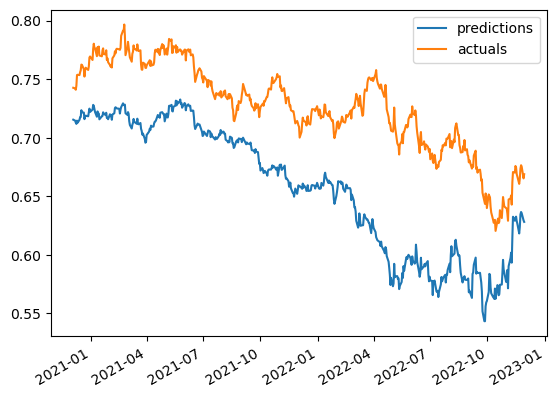

In [91]:
predictions_df.plot()